Setup

In [1]:
%pip install tensorflow 
%pip install opencv-python   
%pip install matplotlib     

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import tensorflow as tf
# import os
# import cv2
# import imghdr
# import numpy as np
# from matplotlib import pyplot as plt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

Working with images

In [3]:
import os       # module for convinient path creations
import cv2      # module for reading images, returns matrixes representing images read
import imghdr   # 

C:\Users\Admin\AppData\Local\Temp\ipykernel_9868\907925680.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr   #


In [4]:
# os.listdir/join usage examples
print(os.listdir('images'))
print(os.listdir(os.path.join('images', 'test')))

['test', 'train', 'val']
['foggy', 'lightning', 'rain', 'stormy', 'sunny', 'sunrise']


In [5]:
# cv2.imread usage example
test_img_path = 'images\\test\\sunny\VXGA3I179QRJ.jpg'
cv2.imread(test_img_path)

array([[[234, 239, 238],
        [234, 239, 238],
        [234, 239, 238],
        ...,
        [194, 132,   0],
        [194, 132,   0],
        [194, 132,   0]],

       [[234, 239, 238],
        [234, 239, 238],
        [234, 239, 238],
        ...,
        [194, 132,   0],
        [194, 132,   0],
        [194, 132,   0]],

       [[234, 239, 238],
        [234, 239, 238],
        [234, 239, 238],
        ...,
        [194, 132,   0],
        [194, 132,   0],
        [194, 132,   0]],

       ...,

       [[ 35,  27,  28],
        [ 41,  33,  34],
        [ 37,  29,  30],
        ...,
        [ 50,  29,  32],
        [ 66,  45,  48],
        [ 71,  50,  53]],

       [[ 34,  26,  27],
        [ 34,  26,  27],
        [ 25,  17,  18],
        ...,
        [ 46,  25,  28],
        [ 59,  38,  41],
        [ 60,  39,  42]],

       [[ 28,  20,  21],
        [ 28,  20,  21],
        [ 24,  16,  17],
        ...,
        [ 38,  17,  20],
        [ 45,  24,  27],
        [ 40,  19,  22]]

In [6]:
# cv2.what usage example
test_img_path = 'images\\test\\sunny\\VXGA3I179QRJ.jpg'
imghdr.what(test_img_path) 

'jpeg'

In [7]:
def remove_unsupported_formates(data_dir: str, supported_formates):
    for image_class in os.listdir(data_dir): 
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join(data_dir, image_class, image)
            try: 
                img = cv2.imread(image_path)            # returns a matrix
                img_format = imghdr.what(image_path)    # returns img format as string
                if img_format not in supported_formates: 
                    print('Image format is not supported: {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e: 
                print('Exception was caught, skipping this image: {}'.format(image_path))

In [8]:
image_supported_formats = ['jpeg','jpg','png']  # supported img formats


training_data_dir = os.path.join('images', 'train')
validation_data_dir = os.path.join('images', 'val')
test_data_dir = os.path.join('images', 'test')

remove_unsupported_formates(data_dir=training_data_dir, supported_formates=image_supported_formats)
remove_unsupported_formates(data_dir=validation_data_dir, supported_formates=image_supported_formats)
remove_unsupported_formates(data_dir=test_data_dir, supported_formates=image_supported_formats)

In [9]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

Found 986 files belonging to 6 classes.
Found 324 files belonging to 6 classes.
Found 346 files belonging to 6 classes.
2
(32, 256, 256, 3)
(32,)
['foggy', 'lightning', 'rain', 'stormy', 'sunny', 'sunrise']


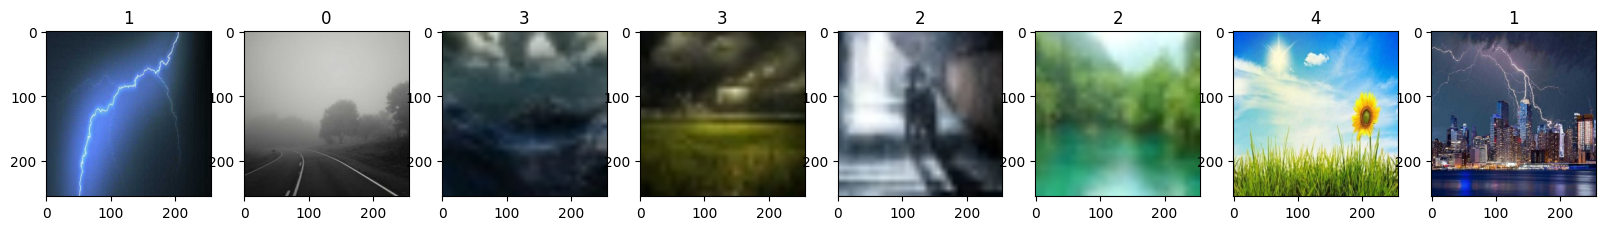

In [30]:
training_data = tf.keras.utils.image_dataset_from_directory(training_data_dir)
validation_data = tf.keras.utils.image_dataset_from_directory(validation_data_dir)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir)

data_iterator = training_data.as_numpy_iterator()   # lazy iterator
batch_of_images = data_iterator.next()              # activate the iterator, a “batch” refers to a subset of the entire dataset used to train a model in one iteration of the training process

print(len(batch_of_images))
print(batch_of_images[0].shape)     # a numpy array with the shape: (batch_size, height, width, channels(rgb))
print(batch_of_images[1].shape)     # a numpy array with labels for each img, each label is its own used directory

_, axes = plt.subplots(ncols=8, figsize=(20,20))
for batch_index, img in enumerate(batch_of_images[0][:8]):
    axes[batch_index].imshow(img.astype(int))   # convert images to int from floats
    axes[batch_index].title.set_text(batch_of_images[1][batch_index])

print(training_data.class_names)


Process data

In [11]:
print(batch_of_images[0].min())
print(batch_of_images[0].max())
# print(batch_of_images[0][0][0][0])

training_data = training_data.map(lambda x,y: (x/255, y))
validation_data = validation_data.map(lambda x,y: (x/255, y))
test_data = test_data.map(lambda x,y: (x/255, y))

batch_of_images = training_data.as_numpy_iterator().next()
print(batch_of_images[0].min())
print(batch_of_images[0].max())
print(batch_of_images)

# data_iterator = data.as_numpy_iterator()                                  
# batch_of_images = data_iterator.next() 
# print(batch_of_images[0][0][0][0])

0.0
255.0
0.0
1.0
(array([[[[0.09522059, 0.13443628, 0.17732844],
         [0.06066176, 0.10796569, 0.1689951 ],
         [0.19301471, 0.24767157, 0.34583333],
         ...,
         [0.30392158, 0.4372549 , 0.6254902 ],
         [0.30992648, 0.4432598 , 0.6314951 ],
         [0.31384805, 0.44718137, 0.6354167 ]],

        [[0.14669117, 0.18553922, 0.22438726],
         [0.04080882, 0.06605392, 0.13002451],
         [0.29632354, 0.34730393, 0.44620097],
         ...,
         [0.30465686, 0.4379902 , 0.6262255 ],
         [0.31213236, 0.44546568, 0.63370097],
         [0.31605393, 0.44938725, 0.63762254]],

        [[0.31335783, 0.35      , 0.38541666],
         [0.31139705, 0.35134804, 0.41090685],
         [0.46948528, 0.51862746, 0.61151963],
         ...,
         [0.30906862, 0.44240198, 0.6306372 ],
         [0.31433824, 0.44767156, 0.6359069 ],
         [0.31887254, 0.4522059 , 0.6404412 ]],

        ...,

        [[0.44080883, 0.37414217, 0.16237745],
         [0.5373775 , 0.47

Train

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="model_logs")

history = model.fit(training_data, epochs=15, validation_data=validation_data, callbacks=[tensorboard_callback])

Epoch 1/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.4560 - loss: 1.4703 - val_accuracy: 0.5000 - val_loss: 1.3888
Epoch 2/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6841 - loss: 0.8895 - val_accuracy: 0.4259 - val_loss: 1.5471
Epoch 3/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7270 - loss: 0.7479 - val_accuracy: 0.6389 - val_loss: 1.0971
Epoch 4/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8344 - loss: 0.4732 - val_accuracy: 0.6944 - val_loss: 0.9573
Epoch 5/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8622 - loss: 0.3746 - val_accuracy: 0.7284 - val_loss: 0.8809
Epoch 6/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.8995 - loss: 0.3050 - val_accuracy: 0.6944 - val_loss: 1.1900
Epoch 7/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8972 - loss: 0.2780 - val_accuracy: 0.7099 - val_loss: 1.0848
Epoch 8/15
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9063 - loss: 0.2924 - val_accuracy: 0.7

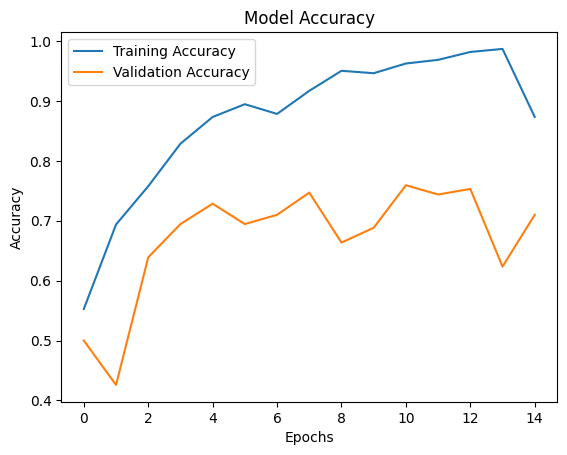

In [15]:
# training accuracy - metric of how well the model performs on the same data it was trained on
# validation accurasy - metric of how well the model performs on the development(validation) data set

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

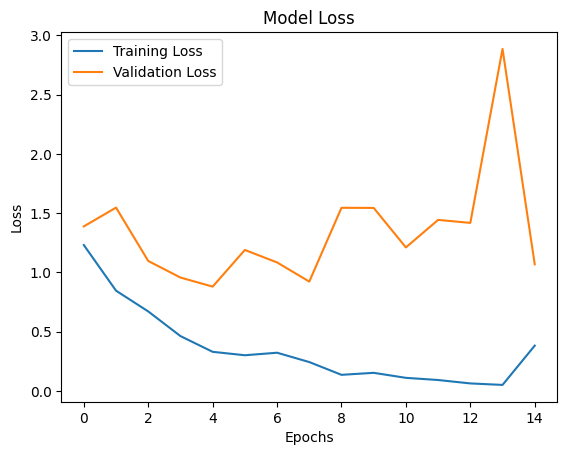

In [16]:
# Decreasing Validation Loss - if the validation loss decreases over time, 
#   it indicates that the model is generalizing better, it's making better predictions on the validation set.
# Increasing Validation Loss - if the validation loss starts to increase while the training loss continues to decrease, 
#   it indicates overfitting. The model is becoming too specialized to the training data and is failing to generalize to new data.

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test

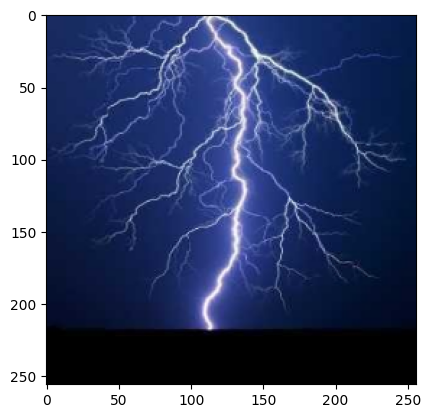

In [24]:
import cv2
import matplotlib.pyplot as plt
# img = cv2.imread('images\\val\\foggy\\3NKGGBIT8XOX.jpg')
img = cv2.imread('D:\\Admin\\Desktop\\Picture Classifier\\images\\test\\lightning\\3ZVABDZBB2XI.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

resize = tf.image.resize(img_rgb, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [25]:
prediction = model.predict(np.expand_dims(resize/255, 0))
training_data = tf.keras.utils.image_dataset_from_directory(training_data_dir)

print(prediction)
print(training_data.class_names[np.argmax(prediction)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Found 986 files belonging to 6 classes.
[[9.7391967e-07 9.9999905e-01 1.1849231e-13 7.1573935e-16 1.9458518e-08
  1.5523582e-10]]
lightning
